<a href="https://colab.research.google.com/github/ForhanShahriarFahim/Artificial-Intelligence-Lab/blob/master/Group_9_Assignment_4(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import cv2
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow import keras

# For GPU users

In [19]:
physical_devices = tf.config.list_physical_devices('GPU')
print(f'GPU: {physical_devices}')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

GPU: []


# Dataset from google drive

In [20]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Data Folder Path

In [21]:
train_badam_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/train/Badam"
train_chola_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/train/Chola"
test_badam_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/test/Badam"
test_chola_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/test/Chola"
val_badam_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/validation/Badam"
val_chola_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/validation/Chola"

# Dataset Load

In [22]:
IMAGE_WIDTH, IMAGE_HEIGHT = 32, 32

# train_badam_dir = "./Latest Dataset/train/Badam/"
# train_chola_dir = "./Latest Dataset/train/Chola/"
# test_badam_dir = "./Latest Dataset/test/Badam/"
# test_chola_dir = "./Latest Dataset/test/Chola/"
# val_badam_dir = "./Latest Dataset/validation/Badam/"
# val_chola_dir = "./Latest Dataset/validation/Chola/"


def load_images(directory):
    images = []
    labels = []
    idx = 1
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.jpeg')):
            print(f"\rimage no: {idx}", end='')
            idx = idx + 1
            img = cv2.imread(os.path.join(directory, filename))
            img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img)
            if 'Badam' in directory:
                labels.append(0)
            elif 'Chola' in directory:
                labels.append(1)
    return np.array(images), np.array(labels)


print("Loading train images...")
train_badam_images, train_badam_labels = load_images(train_badam_dir)
print()
train_chola_images, train_chola_labels = load_images(train_chola_dir)
print("\nLoading test images...")
test_badam_images, test_badam_labels = load_images(test_badam_dir)
print()
test_chola_images, test_chola_labels = load_images(test_chola_dir)
print("\nLoading validation images...")
val_badam_images, val_badam_labels = load_images(val_badam_dir)
print()
val_chola_images, val_chola_labels = load_images(val_chola_dir)

train_images = np.concatenate((train_badam_images, train_chola_images))
train_labels = np.concatenate((train_badam_labels, train_chola_labels))
test_images = np.concatenate((test_badam_images, test_chola_images))
test_labels = np.concatenate((test_badam_labels, test_chola_labels))
val_images = np.concatenate((val_badam_images, val_chola_images))
val_labels = np.concatenate((val_badam_labels, val_chola_labels))

train_images = train_images / 255.0
test_images = test_images / 255.0
val_images = val_images / 255.0

print(f'\nShape of train_badam_images: {train_images.shape}')
print(f'Shape of test_badam_images: {train_labels.shape}')
print(f'Shape of test_badam_images: {test_images.shape}')
print(f'Shape of test_badam_images: {test_labels.shape}')
print(f'Shape of val_chola_images: {val_images.shape}')
print(f'Shape of val_chola_images: {val_labels.shape}')

Loading train images...
image no: 551
image no: 551
Loading test images...
image no: 110
image no: 110
Loading validation images...
image no: 55
image no: 55
Shape of train_badam_images: (1102, 32, 32, 3)
Shape of test_badam_images: (1102,)
Shape of test_badam_images: (220, 32, 32, 3)
Shape of test_badam_images: (220,)
Shape of val_chola_images: (110, 32, 32, 3)
Shape of val_chola_images: (110,)


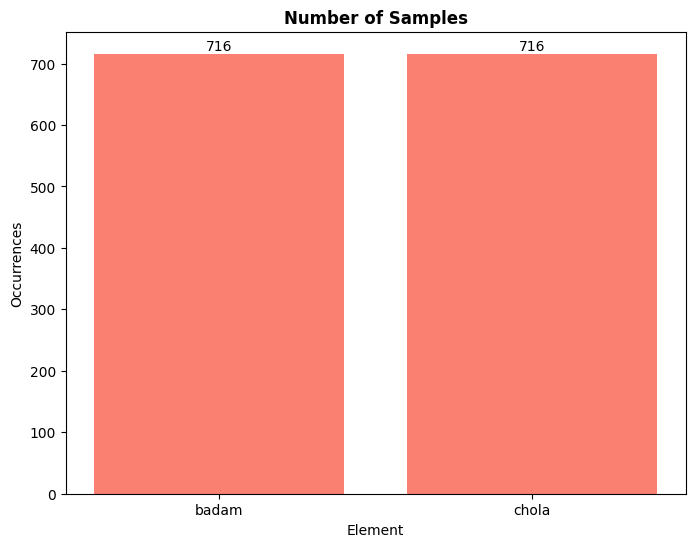

In [105]:
# Concatenate labels from all sets
labels = np.concatenate((train_labels, test_labels, val_labels))

# Count occurrences of each label
values, counts = np.unique(labels, return_counts=True)

# Create bar plot
plt.figure(figsize=(8, 6))  # Set figure size
plt.bar(values, counts, color='salmon')
plt.xlabel('Element')
plt.ylabel('Occurrences')
plt.title('Number of Samples', fontweight='bold')  # Bold title
for i, count in enumerate(counts):
    plt.text(values[i], count, str(count), ha='center', va='bottom')

plt.xticks(values, ['badam', 'chola'])

# Save the figure
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/total_samples.png')

plt.show()

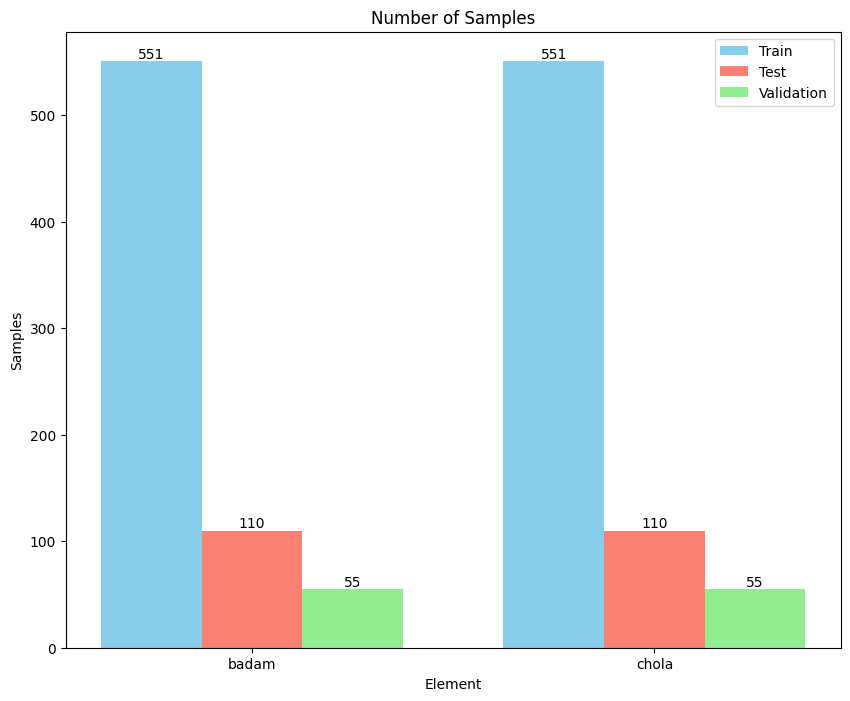

In [106]:
# Calculate counts for each label in train, test, and val sets
train_values, train_counts = np.unique(train_labels, return_counts=True)
test_values, test_counts = np.unique(test_labels, return_counts=True)
val_values, val_counts = np.unique(val_labels, return_counts=True)

# Set the width of each individual bar
bar_width = 0.25

# Set the x positions for the train, test, and val bars
train_x = np.arange(len(train_values)) - bar_width
test_x = np.arange(len(test_values))
val_x = np.arange(len(val_values)) + bar_width

# Set figure size
plt.figure(figsize=(10, 8))

# Plot the train bars and their counts with color skyblue
plt.bar(train_x, train_counts, width=bar_width, label='Train', color='skyblue')
for i, count in enumerate(train_counts):
    plt.text(train_x[i], count, str(count), ha='center', va='bottom')

# Plot the test bars and their counts with color salmon
plt.bar(test_x, test_counts, width=bar_width, label='Test', color='salmon')
for i, count in enumerate(test_counts):
    plt.text(test_x[i], count, str(count), ha='center', va='bottom')

# Plot the val bars and their counts with color lightgreen
plt.bar(val_x, val_counts, width=bar_width, label='Validation', color='lightgreen')
for i, count in enumerate(val_counts):
    plt.text(val_x[i], count, str(count), ha='center', va='bottom')

plt.xlabel('Element')
plt.ylabel('Samples')
plt.title('Number of Samples')

# Set x-axis ticks and labels
plt.xticks(test_x, ['badam', 'chola'])

# Add legend
plt.legend()

# Save the plot
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/spillited_samples.png')

# Show the plot
plt.show()


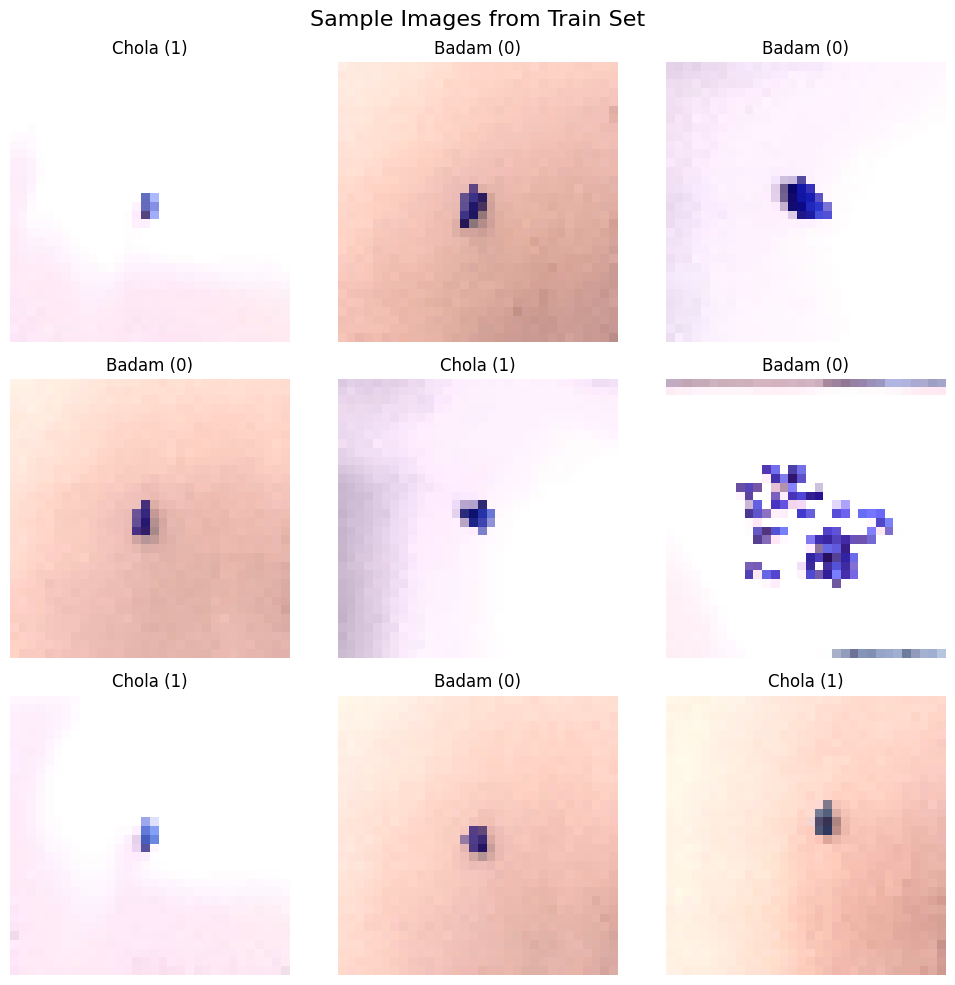

In [37]:
# Define the number of images to plot
num_images = 9

# Get indices for random images from the train set
random_indices = np.random.choice(len(train_images), size=num_images, replace=False)

# Plot the images with labels
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[idx])
    if train_labels[idx] == 0:
        label_text = 'Badam (0)'
    else:
        label_text = 'Chola (1)'
    plt.title(label_text, fontsize=12)
    plt.axis('off')

plt.suptitle('Sample Images from Train Set', fontsize=16)
plt.tight_layout()
plt.show()


Label: badam


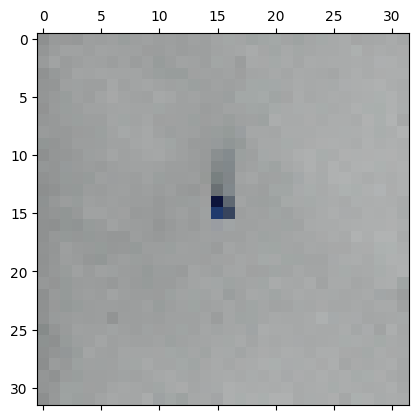

In [25]:
idx = 20
print("Label:", 'badam' if labels[idx]==0 else 'chola')
plt.matshow(train_images[idx])

# CNN Model

In [99]:
# Define input shape
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
inputs = Input(shape=input_shape)

# First Convolutional Layer
conv1 = Conv2D(64, (3, 3), activation='relu', padding = 'same')(inputs)
conv2 = Conv2D(64, (3, 3), activation='relu', padding = 'same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv2)

# Second Convolutional Layer
conv3 = Conv2D(128, (3, 3), activation='relu', padding = 'same')(pool1)
conv4 = Conv2D(128, (3, 3), activation='relu', padding = 'same')(conv3)
conv5 = Conv2D(128, (3, 3), activation='relu', padding = 'same')(conv4)
pool2 = MaxPooling2D((2, 2))(conv5)

# Flatten the output
flatten = Flatten()(pool2)

# Dense Layer
dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(dense1)

# Output layer with 1 neuron for binary classification
outputs = Dense(2, activation='softmax')(dense2)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 128)       147584    
                                                           

In [100]:
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=15)

Epoch 1/15
35/35 [==============================] - 25s 656ms/step - loss: 0.7216 - accuracy: 0.5109 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/15
35/35 [==============================] - 24s 695ms/step - loss: 0.6931 - accuracy: 0.5018 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 3/15
35/35 [==============================] - 22s 618ms/step - loss: 0.6103 - accuracy: 0.6996 - val_loss: 0.5367 - val_accuracy: 0.7182
Epoch 4/15
35/35 [==============================] - 23s 650ms/step - loss: 0.4491 - accuracy: 0.8004 - val_loss: 0.5282 - val_accuracy: 0.7364
Epoch 5/15
35/35 [==============================] - 23s 666ms/step - loss: 0.3057 - accuracy: 0.8766 - val_loss: 0.3303 - val_accuracy: 0.8818
Epoch 6/15
35/35 [==============================] - 21s 613ms/step - loss: 0.2630 - accuracy: 0.9020 - val_loss: 0.2474 - val_accuracy: 0.9182
Epoch 7/15
35/35 [==============================] - 23s 647ms/step - loss: 0.2212 - accuracy: 0.9283 - val_loss: 0.2154 - val_accuracy: 0.9182

# Model history view CNN

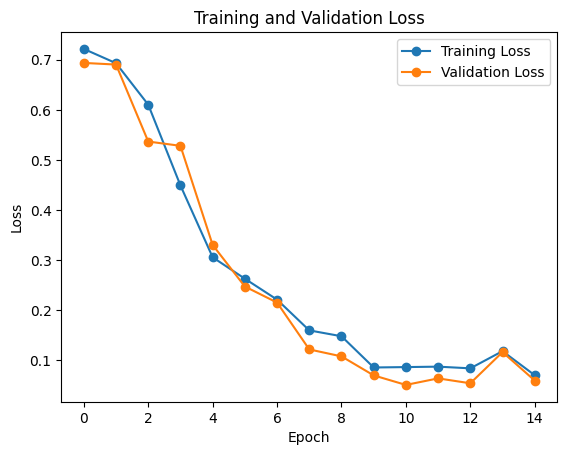

In [101]:
plt.plot(history.history['loss'],  '-o',  label='Training Loss')
plt.plot(history.history['val_loss'], '-o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# plt.savefig('CNN_Training_and_Validation_Loss.png')
plt.show()

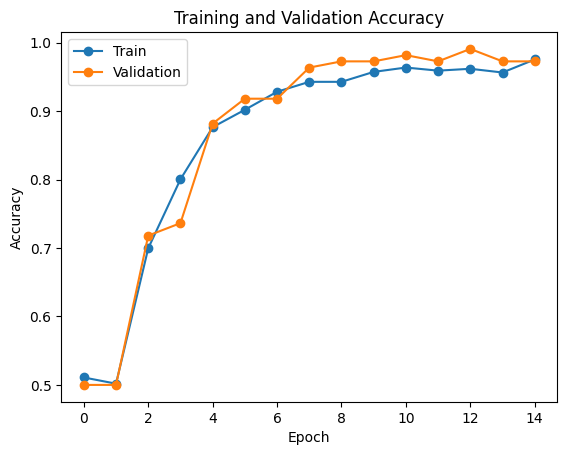

In [102]:
plt.plot(history.history['accuracy'], '-o')
plt.plot(history.history['val_accuracy'], '-o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('CNN_Training_and_Validation_Accuracy.png')
plt.show()

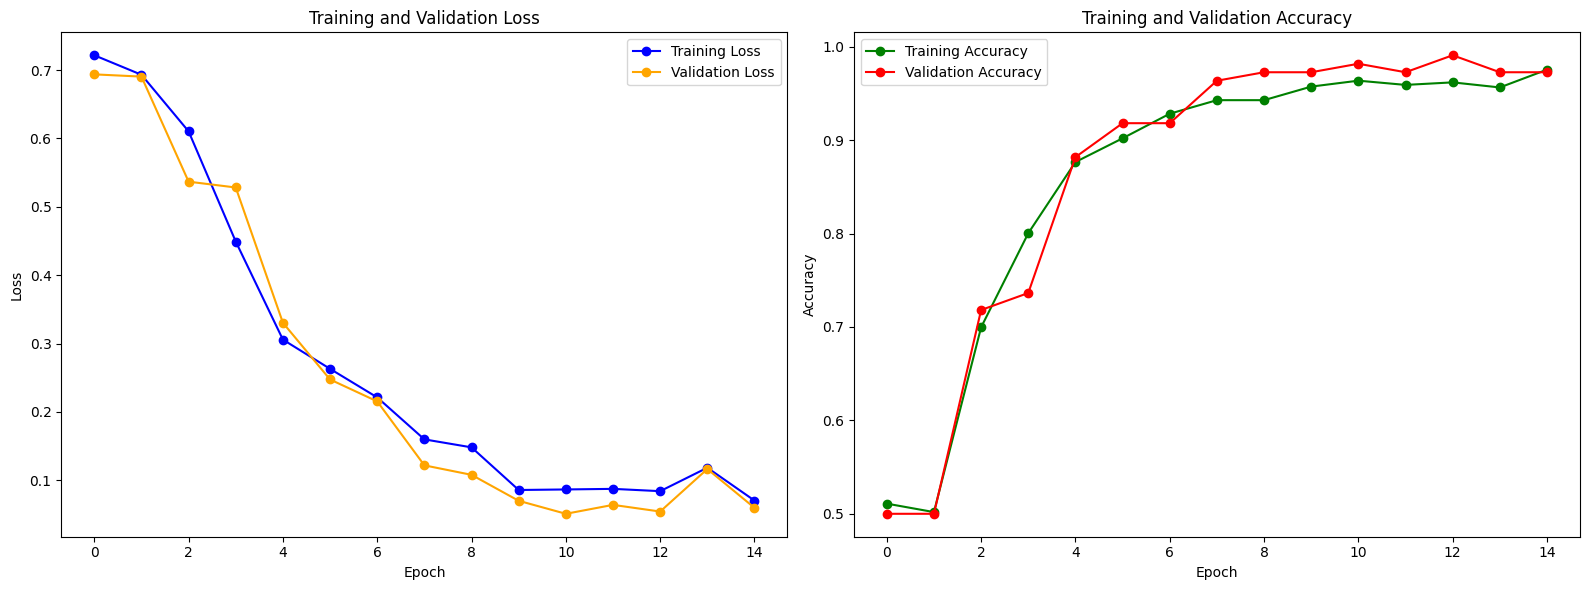

In [116]:
plt.figure(figsize=(16, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '-o', label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], '-o', label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], '-o', label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], '-o', label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/CNN_Training_and_Validation_Accuracy.png')
# Show the plot
plt.show()


# Testing

In [110]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.3f}%")

7/7 [==============================] - 1s 144ms/step - loss: 0.0034 - accuracy: 1.0000
Test Loss: 0.0033538
Test Accuracy: 100.000%


In [109]:
y_pred = model.predict(test_images)
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred[0]

7/7 [==============================] - 1s 141ms/step


array([9.9997300e-01, 2.6976608e-05], dtype=float32)

Actual: badam


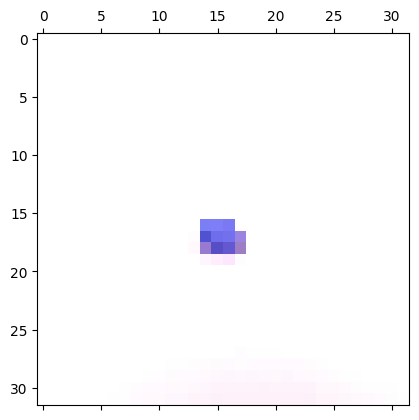

In [41]:
idx = 0
print(f'Actual: {"badam" if np.argmax(y_pred[idx]) == 0 else "chola"}')
plt.matshow(test_images[idx])

#Confusion Matrix CNN

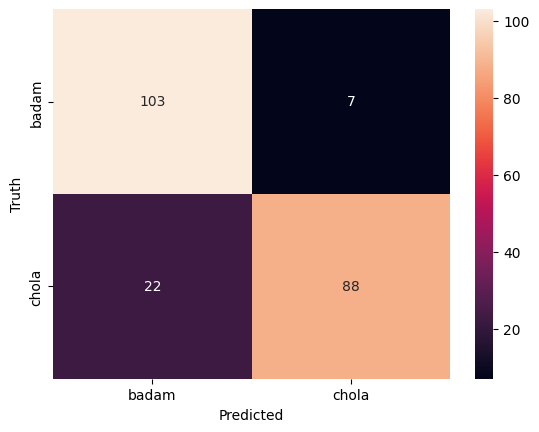

In [108]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_labels)

heatmap = sn.heatmap(cm, annot=True, fmt='d')

heatmap.set_xlabel('Predicted')
heatmap.set_ylabel('Truth')
heatmap.set_xticklabels(['badam', 'chola'], ha='center')
heatmap.set_yticklabels(['badam', 'chola'], va='center')
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/confusion_matrix_CNN.png')
plt.show()

### FCNN Model

In [92]:
inputs = Input((IMAGE_WIDTH, IMAGE_HEIGHT,3), name='input')

x = Flatten()(inputs)
x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)
fcnn_model = Model(inputs, outputs, name='FCNN')

# Compile the model
fcnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print the model summary
fcnn_model.summary()


Model: "FCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 flatten_17 (Flatten)        (None, 3072)              0         
                                                                 
 dense_92 (Dense)            (None, 32)                98336     
                                                                 
 dense_93 (Dense)            (None, 64)                2112      
                                                                 
 dense_94 (Dense)            (None, 128)               8320      
                                                                 
 dense_95 (Dense)            (None, 256)               33024     
                                                                 
 dense_96 (Dense)            (None, 128)               32896  

In [93]:
# Fit the model
history = fcnn_model.fit(train_images, train_labels,
                         epochs=20,
                         validation_data=(val_images, val_labels))

Epoch 1/20
35/35 [==============================] - 3s 27ms/step - loss: 0.6936 - accuracy: 0.4891 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/20
35/35 [==============================] - 0s 13ms/step - loss: 0.6914 - accuracy: 0.5045 - val_loss: 0.6901 - val_accuracy: 0.5364
Epoch 3/20
35/35 [==============================] - 1s 16ms/step - loss: 0.6877 - accuracy: 0.5481 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 4/20
35/35 [==============================] - 1s 15ms/step - loss: 0.6816 - accuracy: 0.6007 - val_loss: 0.7039 - val_accuracy: 0.5000
Epoch 5/20
35/35 [==============================] - 0s 13ms/step - loss: 0.6835 - accuracy: 0.5345 - val_loss: 0.6816 - val_accuracy: 0.5000
Epoch 6/20
35/35 [==============================] - 0s 6ms/step - loss: 0.6665 - accuracy: 0.5989 - val_loss: 0.6922 - val_accuracy: 0.5182
Epoch 7/20
35/35 [==============================] - 0s 7ms/step - loss: 0.6894 - accuracy: 0.5181 - val_loss: 0.6731 - val_accuracy: 0.5182
Epoch 8/20
35/3

#Plotting

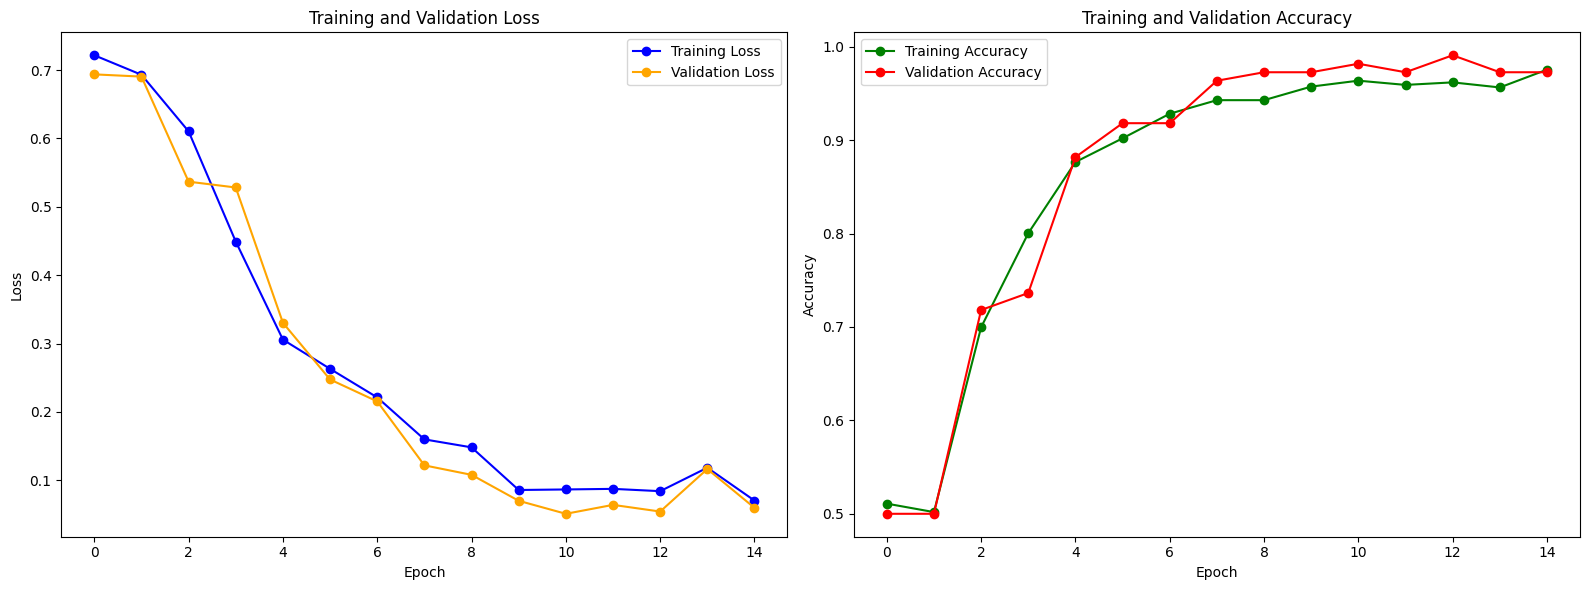

In [111]:
plt.figure(figsize=(16, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '-o', label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], '-o', label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], '-o', label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], '-o', label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/FCNN_Training_and_Validation_Accuracy_Loss.png')
# Show the plot
plt.show()


#Testing

In [95]:
test_loss, test_accuracy = fcnn_model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.3f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.4264 - accuracy: 0.8682
Test Loss: 0.4263743
Test Accuracy: 86.818%


In [113]:
y_pred = fcnn_model.predict(test_images)
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred[0]

7/7 [==============================] - 0s 3ms/step


array([0.3655772, 0.6344227], dtype=float32)

Actual: chola


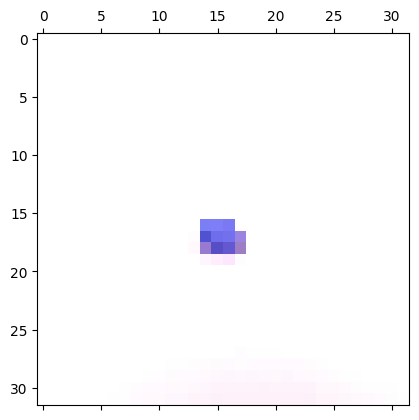

In [114]:
idx = 0
print(f'Actual: {"badam" if np.argmax(y_pred[idx]) == 0 else "chola"}')
plt.matshow(test_images[idx])

#Confusion Matrix

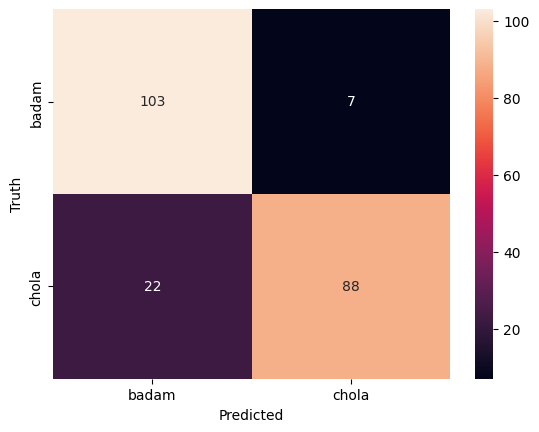

In [115]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_labels)

heatmap = sn.heatmap(cm, annot=True, fmt='d')

heatmap.set_xlabel('Predicted')
heatmap.set_ylabel('Truth')
heatmap.set_xticklabels(['badam', 'chola'], ha='center')
heatmap.set_yticklabels(['badam', 'chola'], va='center')
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/confusion_matrix_FCNN.png')
plt.show()